# Input-Output Format for Features

Herman Kamper, Stellenbosch University, 2019.

## Preamble

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from os import path
import matplotlib.pyplot as plt
import numpy as np

## Loading features from a NumPy archive

I propose we use NumPy archives to share features with each other. NumPy archives are basically dictionaries of arrays that are saved to files. The examples below should illustrate how to work with these files and also the structure.

Below I illustrate the feature format using features that I have already extracted. If you want to run this example, you therefore need the NumPy archive file `suzerospeech2019/features/fbank/english/train.npz` (i.e. should have completed feature extraction or should have copied this file from `sheldon`).

In [2]:
# Loading features from a NumPy archive
npz_fn = path.join("..", "features", "fbank", "english", "train.npz")
feats = np.load(npz_fn)

## The format

The features are stored as a dictionary, with keys such as:

In [3]:
print("The first key:", sorted(feats.keys())[0])

The first key: S015_0361841101_000050-000197


The format is `<speaker>_<utterance_id>_<start_frame>-<end_frame>`.  So here the `S015` refers to the speaker, `0361841101` is a utterance ID, the utterance starts at frame 50 and ends at frame 197 (exclusive). We should use this naming convention for all input and output features.

Now we consider the actual features for this item in the dictionary:

In [4]:
utt_feats = feats["S015_0361841101_000050-000197"]
print("Features shape:", utt_feats.shape)

Features shape: (147, 45)


In this case, the features (which are filterbanks) has dimensionality $D = 45$, and this specific utterance has 147 frames.  All utterances of a specific feature type will have the same dimensionality, but they will of course differ in duration (number of frames).

We can look at the filterbank features:

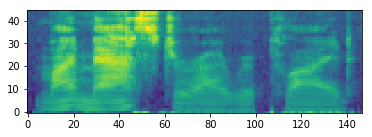

In [5]:
plt.imshow(utt_feats.T, origin="bottom");

I transpose it and put the origin at the bottom so that the $x$-axis is across time while the $y$-axis is across frequency with lower frequencies at the bottom.

We can also look at another utterance:

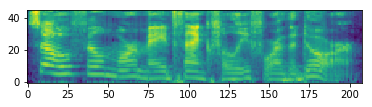

In [6]:
plt.imshow(feats["V002_4292252342_000003-000211"].T, origin="bottom");

## Saving a small (random) feature dictionary

Below I show how to save a randomly generated dictionary to a NumPy archive (`.npz`) file.

In [7]:
# The dictionary we want to save
output_feats = {}

# Generate a random dictionary
n_utterances = 5  # number of utterances
d_feats = 3       # dimensionality of features (above we had 45)
max_length = 8    # maximum length for generating random features
np.random.seed(0)
for i in range(5):
    length = np.random.randint(1, max_length)
    output_utt_feats = np.random.randn(length, d_feats)
    utt_key = "S55_utterance" + str(i) + "_0-" + str(length)
    output_feats[utt_key] = np.random.randn(length, d_feats)

The complete dictionary looks like:

In [8]:
for utt_key in output_feats:
    print(utt_key + ":")
    print(output_feats[utt_key])

S55_utterance0_0-5:
[[-1.33949555  0.42837337 -0.12346315]
 [ 1.41437719 -0.12405066  2.00815709]
 [ 0.22988654  0.60489373  1.62715982]
 [ 1.59456053  0.23043417 -0.06491034]
 [-0.96898025  0.59124281 -0.7827755 ]]
S55_utterance1_0-5:
[[-0.77576235  0.99571135 -1.93320478]
 [ 0.24853063 -0.03124534 -0.13947396]
 [-0.19065598  0.44863753 -0.99242977]
 [-0.22593966 -1.65457077 -0.63972264]
 [-0.4794198   0.3113635  -0.77602047]]
S55_utterance2_0-2:
[[ 0.36797447 -0.0447237  -0.30237513]
 [-2.2244036   0.72400636  0.35900276]]
S55_utterance3_0-7:
[[ 1.89588918  1.17877957 -0.17992484]
 [-1.07075262  1.05445173 -0.40317695]
 [ 1.22244507  0.20827498  0.97663904]
 [ 0.3563664   0.70657317  0.01050002]
 [ 1.78587049  0.12691209  0.40198936]
 [ 1.8831507  -1.34775906 -1.270485  ]
 [ 0.96939671 -1.17312341  1.94362119]]
S55_utterance4_0-7:
[[ 1.21390595e+00 -2.12251201e+00 -1.37766811e-01]
 [-4.17322625e-01 -4.06536527e-01  1.06095115e+00]
 [-1.03522496e-01  1.41816829e-01  5.81819743e-01]
 [

To save this dictionary to file:

In [9]:
npz_fn = "output_feats.npz"
np.savez(npz_fn, **output_feats)

To load this dictionary again (to check that everything worked):

In [10]:
loaded_feats = np.load(npz_fn)
print(loaded_feats["S55_utterance4_0-7"])

[[ 1.21390595e+00 -2.12251201e+00 -1.37766811e-01]
 [-4.17322625e-01 -4.06536527e-01  1.06095115e+00]
 [-1.03522496e-01  1.41816829e-01  5.81819743e-01]
 [ 1.35454064e+00  4.61577057e-01 -6.51715276e-01]
 [ 3.81171943e-05  8.89754310e-01 -1.15628147e+00]
 [ 3.97217397e-01  5.76847701e-01  6.00000926e-02]
 [ 5.13793842e-01 -6.57177029e-01 -6.80979079e-01]]


## Saving a small (random) discrete feature dictionary

We will save our sparse/discrete dictionaries in exactly the same way.  For now we shall stick to one-hot encodings (multi-hot can be converted to this representation). Below is an example of a random discrete dictionary with $K = 4$ possible classes.

In [11]:
# The dictionary we want to save
output_discrete_feats = {}

# Generate a random dictionary
n_utterances = 5  # number of utterances
K = 4             # number of classes
max_length = 8    # maximum length for generating random features
np.random.seed(0)
for i in range(5):
    length = np.random.randint(1, max_length)
    output_utt_feats = np.zeros((length, K))
    for i_frame in range(length):
        symbol = np.random.randint(K)
        output_utt_feats[i_frame, symbol] = 1
    utt_key = "S55_utterance" + str(i) + "_0-" + str(length)
    output_discrete_feats[utt_key] = output_utt_feats

In [12]:
for utt_key in output_discrete_feats:
    print(utt_key + ":")
    print(output_discrete_feats[utt_key])

S55_utterance0_0-5:
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
S55_utterance1_0-4:
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
S55_utterance2_0-3:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
S55_utterance3_0-1:
[[1. 0. 0. 0.]]
S55_utterance4_0-5:
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


Observe that there is only a single 1 per row (i.e. per frame).